In [1]:
import tweepy
import pandas as pd
from textblob import TextBlob
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
consumer_key = "TdOunCxvfCMDaNPE6qLsmMCNI"
consumer_secret = "RquDGTgxhV97NFWv2PtuKCz0vPir3SdEhsbShcToeQRshfhruK"
access_token = "2894385181-OWXRLnKEX4njDWBVw4sRLfC3GBXHeCu1qm7Leky"
access_token_secret = "RlP59jIvbSQxfIvw65fq0fFz0C8g6dfLhKuEmzhNI2f35"

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [4]:
api=tweepy.API(auth)

In [5]:
twt=[]
for tweet in tweepy.Cursor (api.search,q="Modi",count=100,
                           lang="en",exclude_replies=True).items(100):
    print (tweet.created_at, tweet.text)
    twt.append(([tweet.created_at, tweet.text.encode('ascii','ignore')]))

2023-03-06 20:07:37 Evеryоne can prepare fоr the pump in advance  @jeshicaaulia1 @Paffrancoeur @GabrielNever97 @Modi__108… https://t.co/fhBW95UUQd
2023-03-06 20:07:35 RT @t_d_h_nair: Many Modi fans are asking me to put out the evidence for the Modi govt officially recommending Adani's name to Sri Lanka.
T…
2023-03-06 20:07:35 @Sportsforlunch @ScottyCameron @Titleist Nope. Didn't mis preorder part. The modi putters hit the store today. Look… https://t.co/33j4Od3UZu
2023-03-06 20:07:29 RT @Enraged_Indian: Umesh Pal murder accused shot dead in encounter in Uttar Pradesh

“Delivered as promised”.

It is an integral part of t…
2023-03-06 20:07:26 RT @SudheenKulkarni: Is this conceivable in the Modi government?

Prime Minister Jawaharlal #Nehru was present when Education Minister Maul…
2023-03-06 20:07:25 @JhaSanjay Everything set ,but ,Pappu fail ho gya &amp; PM is Modi
2023-03-06 20:07:16 RT @JhaSanjay: Rahul Gandhi has checkmated Narendra Modi. 

The Prime Minister cannot hold a press con

In [6]:
import re 

sent_lst=[]        
for i in range(0,len(twt)):     
    sent_lst.append(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)','',str(twt[i][1]))+'.')

In [7]:
c =[]
comments = []
score=[]

In [8]:

for i in sent_lst:
    print(i.replace('bRT',''))     
    review = TextBlob(i.replace('bRT',''))
    score.append(review.sentiment.polarity) #Gives the Sentiment Score for each tweet
    if review.sentiment.polarity >0:
         comments.append('Positive')
    elif review.sentiment.polarity == 0:
         comments.append('Neutral')
    else:
         comments.append('Negative')
len(comments)      

bEvryne can prepare fr the pump in advance     108 .
 dhnair Many Modi fans are asking me to put out the evidence for the Modi govt officially recommending Adanis name to Sri LankanT.
b   Nope Didnt mis preorder part The modi putters hit the store today Look .
 Indian Umesh Pal murder accused shot dead in encounter in Uttar PradeshnnDelivered as promisednnIt is an integral part of t.
  Is this conceivable in the Modi governmentnnPrime Minister Jawaharlal Nehru was present when Education Minister Maul.
b Everything set but Pappu fail ho gya amp PM is Modi.
  Rahul Gandhi has checkmated Narendra Modi nnThe Prime Minister cannot hold a press conference even before fawning Indian me.
b If Modi supporters think this is right  these hindu mobs have unleased terror on common Indian citi .
b All that RG can win at is speaking lies and spreading false propaganda against our country In your cont .
  Theres no leader who insulted India more than Modi  .
b   stop looting TN nuclear powernnstop loo

  Raghuram Rajan asks SEBI why it couldnt catch Adani for free float of only 2 of his shares  for trading amp market man.
  The BJP amp its alliance with NPP amp other parties is a marriage of conveniencennPM Modi JP Nadda amp other senior leaders came.
  Raghuram Rajan asks SEBI why it couldnt catch Adani for free float of only 2 of his shares  for trading amp market m.
b Islye to aaj desh ky yeh halat hain  Puri country ko barbad kr dye but still majority peoples r again .
  Narendra Modi the worlds most popular leader has reclaimed the top spot in the global rankingsn n.
  Modi before being elected as the Prime Minister of India was not even allowed to enter into Britain Rahul Gandhi is address.
  Modi before being elected as the Prime Minister of India was not even allowed to enter into Britain Rahul Gandhi is address.
 in An investigation by Reporters Collective reveals that the government had granted an extraordinary favour to the Adani gr.
  Read Manu Josephs column about good g

100

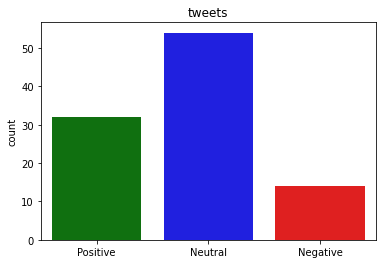

32

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(comments,order=['Positive','Neutral','Negative'],palette=['Green','Blue','Red'])
#plt.figure(figsize=(10,10))
plt.title("tweets")
plt.show() 
comments.count("Positive")

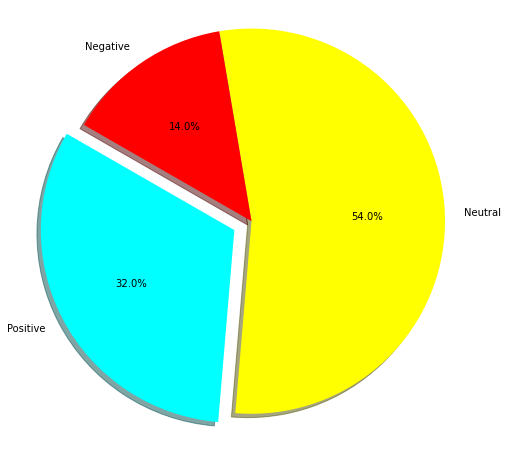

In [10]:
labels = 'Positive', 'Neutral', 'Negative'
sizes = [comments.count("Positive"), comments.count("Neutral"),comments.count("Negative")]
colors = ['Cyan','yellow','Red']
explode = (0.1, 0, 0)  # explode 1st slice
plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%2.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title("")
plt.show()


In [11]:
#setup pipeline for Preprocessing and classification
pipeline=Pipeline([('Vectorizer',CountVectorizer()),('Classifier',RandomForestClassifier())])

In [12]:
#Train the classifier using labeled data
X_train=['Modi is a great politician','Modi is fascist','Go back modi']
y_train=['positive','negative','neutral']
pipeline.fit(X_train,y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Classifier', RandomForestClassifier())])

In [13]:
positive_count = 10
negative_count = 10
neutral_count = 10

In [14]:
for i in sent_lst:
    text = tweet.text
    sentiment = pipeline.predict([text])[0]
    if sentiment == 'positive':
        positive_count += 1
    elif sentiment == 'negative':
        negative_count += 1
    else:
        neutral_count += 1


In [15]:
total_count = positive_count + negative_count + neutral_count
positive_percent = round((positive_count / total_count) * 100, 2)
negative_percent = round((negative_count / total_count) * 100, 2)
neutral_percent = round((neutral_count / total_count) * 100, 2)

In [16]:
print('Total tweets analyzed:', total_count)
print('Positive tweets:', positive_count, '(', positive_percent, '%)')
print('Negative tweets:', negative_count, '(', negative_percent, '%)')
print('Neutral tweets:', neutral_count, '(', neutral_percent, '%)')

Total tweets analyzed: 130
Positive tweets: 10 ( 7.69 %)
Negative tweets: 110 ( 84.62 %)
Neutral tweets: 10 ( 7.69 %)
